In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import xgboost
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib
import sksurv
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.linear_model import LogisticRegression
from pylab import rcParams

# Key library versions

In [3]:
xgboost.__version__

'1.7.6'

In [4]:
sksurv.__version__

'0.21.0'

In [5]:
shap.__version__

'0.41.0'

# Load example dataset 

This is a randomly generated dataset used for demo purposes and therefore does not represent real patients from the original dataset that were used to generate the models in this work.

In [6]:
X = pd.read_csv('datasets/example_data.csv',index_col='patient')
X

,specific_health_conditions,mobilisation_method,mobility_equipment_used,night_assistance_needed,poor_eating_or_lack_of_appetite,pressure_ulcer_risk_scale,recent_weight_loss,skin_integrity_change,smoked_in_past,gender,age_category,rx_risk_score,chess_scale_score,cognitive_performance_scale_score,depression_rating_scale_score,falls_history,faecal_incontinence,urinary_incontinence
patient,,,,,,,,,,,,,,,,,,
0,3,1,1,0,1,2,0,0,0,1,85,2,3,1,0,0,1,1
1,1,2,1,1,0,1,1,1,1,1,86,0,2,3,3,3,1,1
2,0,1,3,1,1,1,0,0,0,0,88,9,0,2,1,1,0,1
3,1,4,3,1,0,0,1,1,1,1,75,6,0,5,2,2,0,0
4,2,3,2,0,1,3,1,1,0,0,90,13,3,2,1,2,1,0


### Required variables for the predictive model

Refer to the study paper on how the raw values for the following features were captured and transformed into integers.

In [7]:
for f in X.columns:
    print(f)

specific_health_conditions
mobilisation_method
mobility_equipment_used
night_assistance_needed
poor_eating_or_lack_of_appetite
pressure_ulcer_risk_scale
recent_weight_loss
skin_integrity_change
smoked_in_past
gender
age_category
rx_risk_score
chess_scale_score
cognitive_performance_scale_score
depression_rating_scale_score
falls_history
faecal_incontinence
urinary_incontinence


# Load and apply the XGBoost model 

The primary purpose of the XGBoost model is to access the XAI capabilities of SHAP which can provide global summary and dependence plots for insights into the overall behaviour of the model, as well as the reasoning behind the calculation of the risk profile for each individual patient through waterfall plots.

In [8]:
# Load the model from file
model_filename = "models/xgboost_survival_model.bin"
loaded_model = xgboost.Booster()
loaded_model.load_model(model_filename)
print("Model loaded successfully")

Model loaded successfully


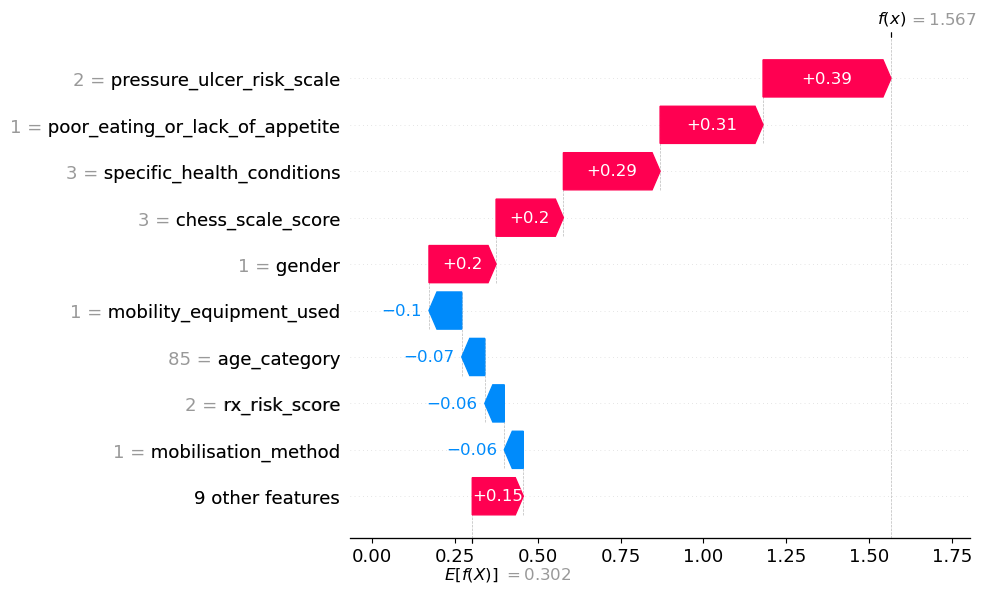

In [9]:
# Compute SHAP values using the TreeExplainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(X)

# Generate a waterfall plot for the first instance in the example dataset
shap.waterfall_plot(shap_values[0])

# Load and apply the Gradient Boosting model


In the referenced study, the Gradient Boosting (GB) model emerges as a key analytical tool for predicting survival probabilities of patients in residential aged care. The study involved a detailed examination of various machine learning models, among which Gradient Boosting was highlighted for its notable performance.

In the study, the Gradient Boosting (GB) model was trained to predict the survival probabilities of patients in residential aged care, producing the survival function for a duration of up to 74 months. A secondary calibration model provided in the next section calibrates the survival probability for patients for a 6-month time point.


In [10]:
# Load GradientBoostingSurvivalAnalysis model
gbsa_filename = 'models/gradient_boosting_survival_model.joblib'
loaded_gbsa_model = joblib.load(gbsa_filename)
print("Model loaded successfully")

Model loaded successfully


### Example of a survival function prediction on the first demo data point

In [11]:
X.loc[0]

specific_health_conditions            3
mobilisation_method                   1
mobility_equipment_used               1
night_assistance_needed               0
poor_eating_or_lack_of_appetite       1
pressure_ulcer_risk_scale             2
recent_weight_loss                    0
skin_integrity_change                 0
smoked_in_past                        0
gender                                1
age_category                         85
rx_risk_score                         2
chess_scale_score                     3
cognitive_performance_scale_score     1
depression_rating_scale_score         0
falls_history                         0
faecal_incontinence                   1
urinary_incontinence                  1
Name: 0, dtype: int64

In [12]:
result = loaded_gbsa_model.predict_survival_function(X.loc[0].values.reshape(1, -1))
result

X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names


array([StepFunction(x=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
              17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
              34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
              51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
              68, 69, 70, 71, 72, 73, 74]), y=array([8.67754080e-01, 6.92567339e-01, 5.86111838e-01, 5.19660682e-01,
              4.62524502e-01, 4.22132779e-01, 3.81719305e-01, 3.51633215e-01,
              3.22206285e-01, 2.93817065e-01, 2.67575198e-01, 2.41331469e-01,
              2.22647182e-01, 2.05044385e-01, 1.85430028e-01, 1.68711448e-01,
              1.52334713e-01, 1.39822917e-01, 1.25003578e-01, 1.13948942e-01,
              1.03416855e-01, 9.28305421e-02, 8.44794696e-02, 7.56502855e-02,
              6.91040400e-02, 6.06349412e-02, 5.41372432e-02, 4.91196205e-02,
              4.35284004e-02, 3.83412867e-02, 3.36474618e-02, 3.01619952

X does not have valid feature names, but GradientBoostingSurvivalAnalysis was fitted with feature names


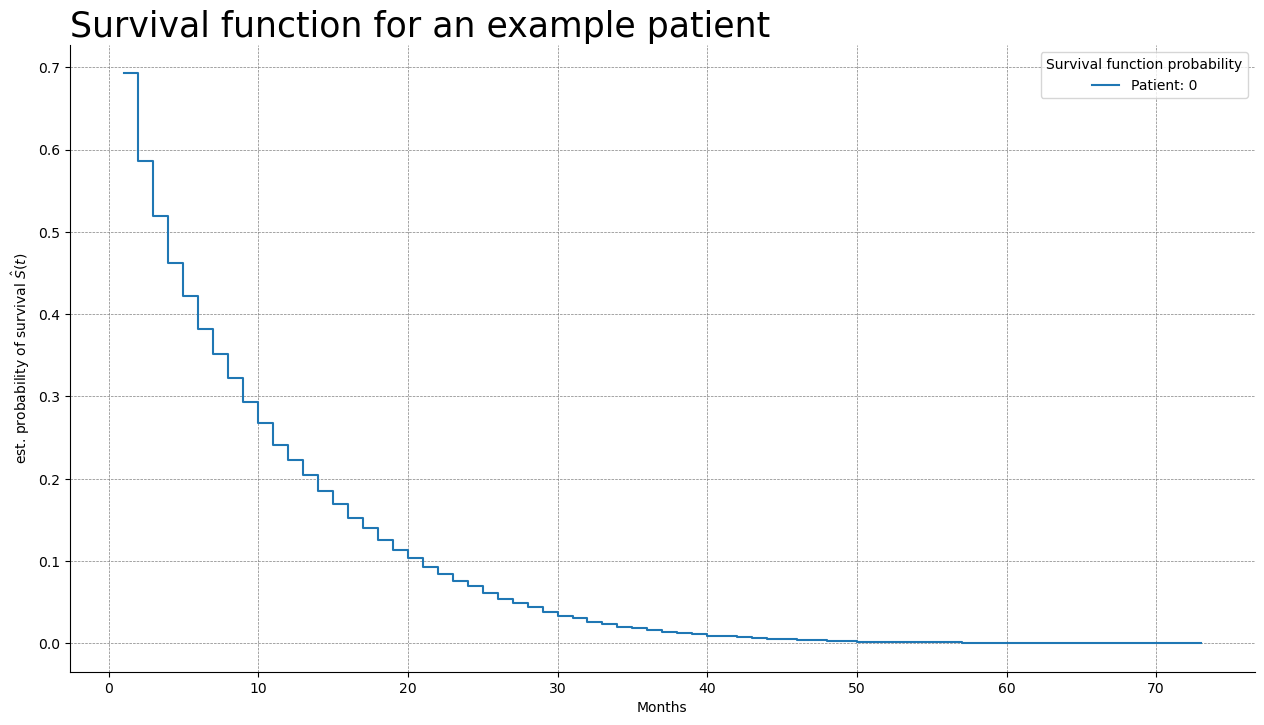

In [13]:
rcParams['figure.figsize'] = 15, 7
sample = 0
fig, ax = plt.subplots()
pred_surv = loaded_gbsa_model.predict_survival_function(X.iloc[[sample] ].values)
time_points = np.arange(1, 74)
for i, surv_func in enumerate(pred_surv):
    ax.step(time_points, surv_func(time_points), where="post", label=f"Patient: " + str(sample)  )  #f"Sample {i + 1}")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("Months")
legend = plt.legend(loc='upper right') #, bbox_to_anchor=(1, 1))
legend.set_title('Survival function probability')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.title('Survival function for an example patient ', loc='left', size=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

### Extract a survival probability for a specific time point

In [14]:
target_time_point = 6
print("Probability of survival at specified time point: ", round(result[0](target_time_point-1),3))

Probability of survival at specified time point:  0.422


# Load and apply the Calibration model 

Following the use of the uncalibrated Gradient Boosting (GB) model, a calibration model refines the survival probability predictions for a critical 6-month time point used in the study to predict survival subsequent to the initial admission to long-term residential care. This calibration model employs the Platt scaling approach, which is essentially a form of logistic regression. Platt scaling is a widely recognized method for converting raw model outputs into probabilities, particularly useful in enhancing the accuracy of the generated probabilities in the models.

In this context, the calibration model takes not only the same inputs as the original GB model but also incorporates the probability output from the GB model itself. By doing so, it effectively optimizes or 'calibrates' these probabilities. This process aligns the raw predictions from the GB model with actual observed outcomes, thereby improving the reliability and interpretability of the survival probabilities.

The incorporation of Platt scaling into the calibration model is a strategic choice. It leverages the logistic regression framework to transform the initial predictions into calibrated probabilities, which can be more directly applicable and meaningful in clinical decision-making contexts. 

In [15]:
# LogisticRegression model
lr_filename = 'models/platt_calibration_model.joblib'
# Load LogisticRegression model
calibration_model = joblib.load(lr_filename)

We now take the same example patient above and add the predicted probability from the GB, before passing it to the calibration model to revise the probability for a 6-month time point.

In [16]:
target_patient = X.loc[0].copy()
target_patient

specific_health_conditions            3
mobilisation_method                   1
mobility_equipment_used               1
night_assistance_needed               0
poor_eating_or_lack_of_appetite       1
pressure_ulcer_risk_scale             2
recent_weight_loss                    0
skin_integrity_change                 0
smoked_in_past                        0
gender                                1
age_category                         85
rx_risk_score                         2
chess_scale_score                     3
cognitive_performance_scale_score     1
depression_rating_scale_score         0
falls_history                         0
faecal_incontinence                   1
urinary_incontinence                  1
Name: 0, dtype: int64

In [17]:
target_patient['survival_probability'] = result[0](target_time_point-1)
target_patient

specific_health_conditions            3.000000
mobilisation_method                   1.000000
mobility_equipment_used               1.000000
night_assistance_needed               0.000000
poor_eating_or_lack_of_appetite       1.000000
pressure_ulcer_risk_scale             2.000000
recent_weight_loss                    0.000000
skin_integrity_change                 0.000000
smoked_in_past                        0.000000
gender                                1.000000
age_category                         85.000000
rx_risk_score                         2.000000
chess_scale_score                     3.000000
cognitive_performance_scale_score     1.000000
depression_rating_scale_score         0.000000
falls_history                         0.000000
faecal_incontinence                   1.000000
urinary_incontinence                  1.000000
survival_probability                  0.422133
Name: 0, dtype: float64

We can now make a prediction using the calibrated model that revises the original probability of survival.

In [18]:
calibration_model.predict_proba(target_patient.values.reshape(1, -1))[0,1]

X does not have valid feature names, but LogisticRegression was fitted with feature names


0.1908552266808232